In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
X_train_nontreeb = pd.read_csv("//content/drive/MyDrive/X_train_nontreeb.csv")
X_test_nontreeb = pd.read_csv("//content/drive/MyDrive/X_test_nontreeb.csv")
X_train_treeb = pd.read_csv("//content/drive/MyDrive/X_train_treeb.csv")
X_test_treeb = pd.read_csv("//content/drive/MyDrive/X_test_treeb.csv")
y_train = pd.read_csv("//content/drive/MyDrive/y_train.csv")
y_test = pd.read_csv("/content/drive/MyDrive/y_test.csv")

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train_nontreeb_pca = sc.fit_transform(X_train_nontreeb)
X_test_nontreeb_pca = sc.transform (X_test_nontreeb)
from sklearn.decomposition import PCA 
pca = PCA(n_components=15) 
X_train_nontreeb_pca = pca.fit_transform(X_train_nontreeb_pca) 
X_test_nontreeb_pca = pca.transform(X_test_nontreeb_pca) 

X_train_nontreeb = sc.fit_transform(X_train_nontreeb)
X_test_nontreeb = sc.transform (X_test_nontreeb)

X_train_treeb = sc.fit_transform(X_train_treeb)
X_test_treeb = sc.transform (X_test_treeb)

In [ ]:
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
################################################################################

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
params = {"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [  4, 5, 6, 8, 10, 12],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3],
 "colsample_bytree" : [ 0.3, 0.4, 0.5] }
model = XGBClassifier(objective="multi:softprob",tree_method='gpu_hist', gpu_id=0, predictor='gpu_predictor', random_state=42)
model_xgb = RandomizedSearchCV(model,params,cv=5, scoring = 'f1_weighted',n_jobs=-1)
tuned_model_xgb = model_xgb.fit(X_train_treeb, y_train)

In [ ]:
y_pred = tuned_model_xgb.predict(X_test_treeb)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 79.64%


In [ ]:
y_scores =tuned_model_xgb.predict_proba(X_test_treeb)
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_scores,multi_class='ovr')

0.8721795620163535

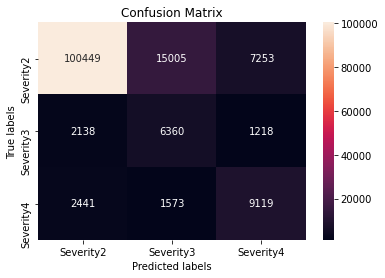

In [ ]:
from sklearn.metrics import confusion_matrix
conf_nb = confusion_matrix(y_pred,y_test)
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(conf_nb, fmt='d', annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Severity2', 'Severity3', 'Severity4']); ax.yaxis.set_ticklabels(['Severity2', 'Severity3', 'Severity4']);

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

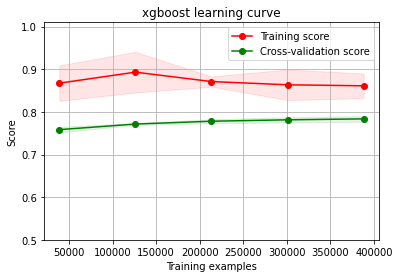

In [ ]:
import numpy as np 
from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt
#
plot_learning_curve(tuned_model_xgb, "xgboost learning curve", X_train_treeb, y_train, ylim=(0.5, 1.01), cv=3, n_jobs=1)

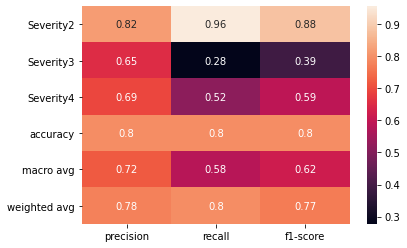

In [ ]:
def plot_classification_report(cr, title='Classification report ', with_avg_total=False, cmap=plt.cm.Blues):

    lines = cr.split('\n')

    classes = []
    plotMat = []
    for line in lines[2 : (len(lines) - 3)]:
        #print(line)
        t = line.split()
        # print(t)
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        print(v)
        plotMat.append(v)

    if with_avg_total:
        aveTotal = lines[len(lines) - 1].split()
        classes.append('avg/total')
        vAveTotal = [float(x) for x in t[1:len(aveTotal) - 1]]
        plotMat.append(vAveTotal)


    plt.imshow(plotMat, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    x_tick_marks = np.arange(3)
    y_tick_marks = np.arange(len(classes))
    plt.xticks(x_tick_marks, ['precision', 'recall', 'f1-score'], rotation=45)
    plt.yticks(y_tick_marks, classes)
    plt.tight_layout()
    plt.ylabel('Classes')
    plt.xlabel('Measures')
#
from sklearn.metrics import classification_report
target_names=['Severity2','Severity3','Severity4']
classificationReport = classification_report(y_test, y_pred, target_names=target_names,output_dict=True)
sns.heatmap(pd.DataFrame(classificationReport).iloc[:-1, :].T, annot=True);